In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('../'))
from dataset import SNPmarkersDataset

In [2]:
validation_dataset = SNPmarkersDataset(mode = "validation", dir_path= "../../Data")
test_dataset = SNPmarkersDataset(mode = "test", dir_path= "../../Data")

KeyboardInterrupt: 

# Result analysis GBLUP

The script used to generate the results can be found in `Scripts/GBLUP.sh`. We use then the results found in the .pred file of each phenotype and the true results to compute the pearson correlation and MAE for every phenotype.

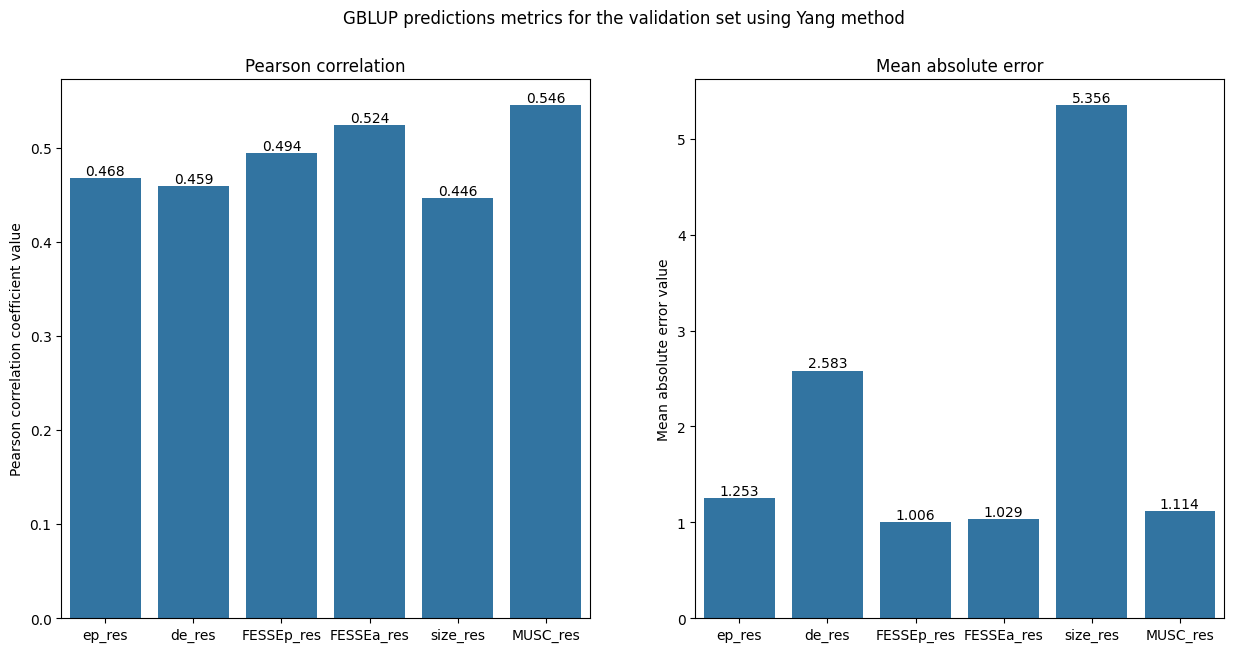

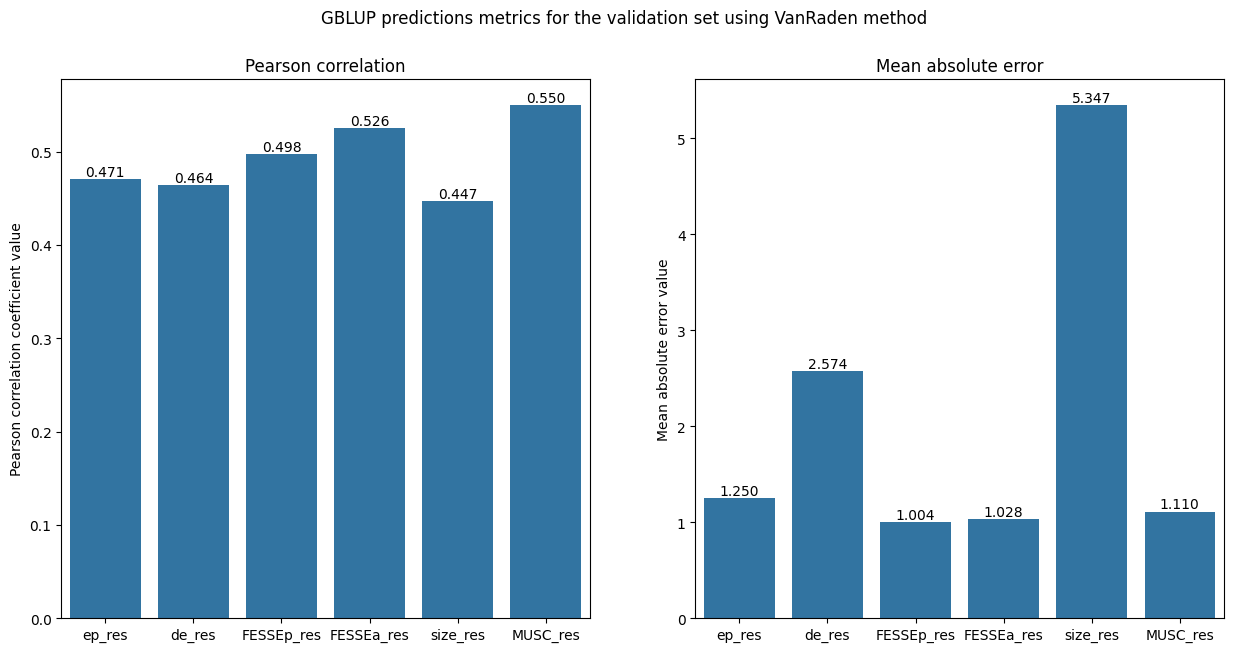

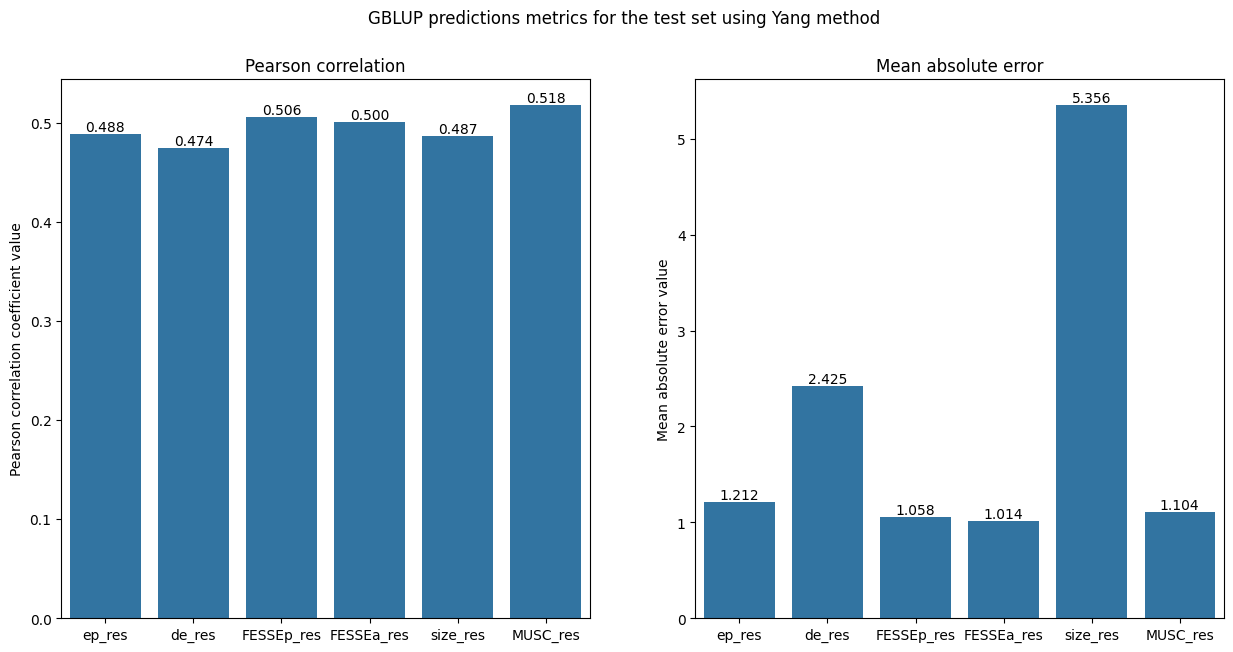

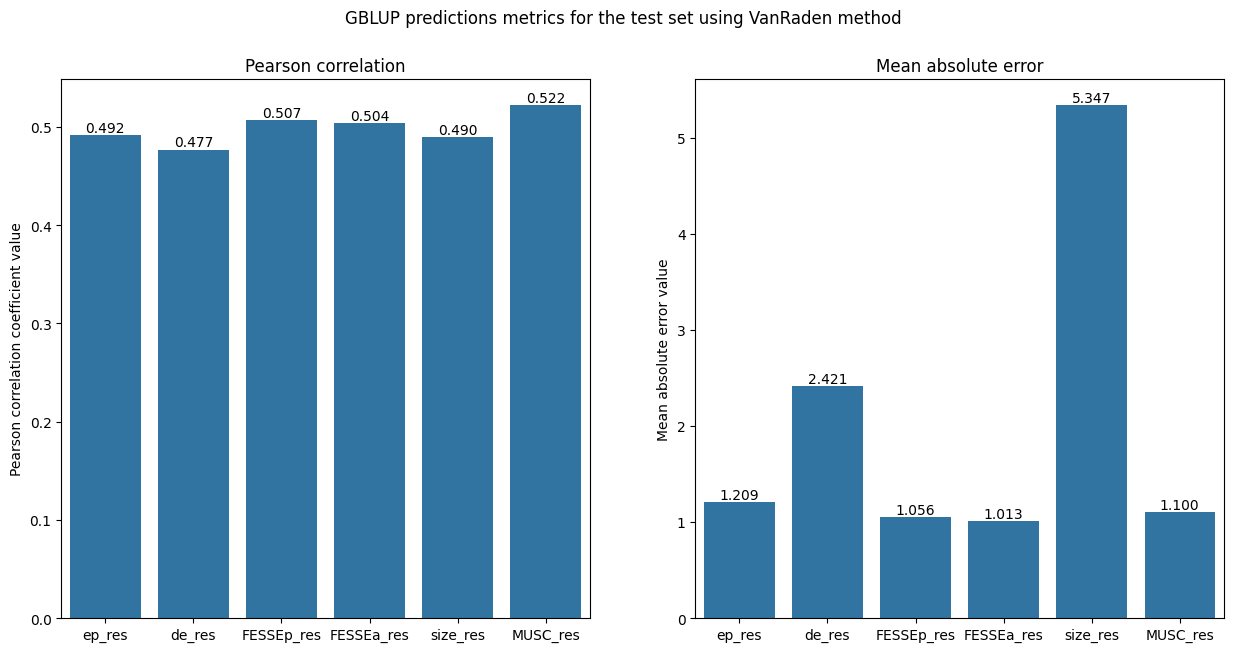

In [ ]:
for dataset in [validation_dataset, test_dataset]:
    for method in ["Yang", "VanRaden"]:
        correlation = []
        MAE = []
        for pheno in dataset.phenotypes.keys():
            dataset.set_phenotypes = pheno
            indexes = dataset.get_all_SNP().index
            
            predictions = pd.read_csv(f"../GBLUP/{pheno}/gblup_{method}.pred", sep = "\t", index_col= 1).loc[indexes]

            true_values = dataset.phenotypes[pheno]

            correlation.append(pearsonr(predictions["Total"], true_values).statistic)
            MAE.append(mean_absolute_error(predictions["Total"], true_values))

        fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15 , 7))
        fig.suptitle(f"GBLUP predictions metrics for the {dataset.mode} set using {method} method")
        sns.barplot(x=dataset.phenotypes.keys(), y=correlation, ax = ax1)
        ax1.set_title("Pearson correlation")
        ax1.set_ylabel("Pearson correlation coefficient value")

        for bar in ax1.containers:
            ax1.bar_label(bar, fmt='%.3f')

        sns.barplot(x=dataset.phenotypes.keys(), y= MAE, ax=ax2)
        ax2.set_ylabel(f"Mean absolute error value")
        ax2.set_title("Mean absolute error")

        for bar in ax2.containers:
            ax2.bar_label(bar, fmt='%.3f')
        plt.show()

# Analysis
- There isn't much differances between the Yang and VanRaden method
- Some phenotypes have a great difference between the correlation given with the test set and the validation set (for phenotype ep_res, size_res, MUSC_res), the others are more accuraltly predicted by the validation set in comparaison on the test set results.
- For the MAE, despite the great variation for the de_res phenotype, the variation between the two set are moderate/ not surprising.

# Impact of the size of the training set on the GBLUP results

In [7]:
dataset = SNPmarkersDataset(mode = "test", dir_path= "../../Data", skip_check=True)
method = "VanRaden"
correlation = []
MAE = []
sizes = ["200", "500", "1k", "2k", "5k", "10k"]
pheno = "ep_res"
for dataset_size in sizes:
    dataset.set_phenotypes = pheno
    indexes = dataset.get_all_SNP().index
    
    predictions = pd.read_csv(f"../Test_smaller_Datasets_GBLUP/{dataset_size}/{pheno}/gblup_{method}.pred", sep = "\t", index_col= 1).loc[indexes]

    true_values = dataset.phenotypes[pheno]

    correlation.append(pearsonr(predictions["Total"], true_values).statistic)
    MAE.append(mean_absolute_error(predictions["Total"], true_values))

print(f"The sizes of the training set evaluated are {sizes}")
print(f"GBLUP correlation for these training set size: {correlation}")
print(f"GBLUP MAE for these training set size: {MAE}")

The sizes of the training set evaluated are ['200', '500', '1k', '2k', '5k', '10k']
GBLUP correlation for these training set size: [0.2697532430132438, 0.306027082695542, 0.3388680094219327, 0.3917819183098994, 0.44179972380819144, 0.4635924101809954]
GBLUP MAE for these training set size: [1.4199657038745386, 1.3216971872693726, 1.3157722275522754, 1.281110877306273, 1.2493234852398525, 1.23519323800738]
